In [1]:
import pandas as pd
import numpy as np

## First step upload our data 

In [2]:
df_ticket_data = pd.read_csv("data/ticket_data.csv")
df_cities = pd.read_csv("data/cities.csv")
df_stations = pd.read_csv("data/stations.csv")
df_providers = pd.read_csv("data/providers.csv")

## checking our data and understanding it

In [3]:
df_ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [4]:
df_cities.head()

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [5]:
df_stations.head()

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [6]:
df_providers.sample(5)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
65,79,9,315,busOperator,Bus Operator,False,False,False,False,bus
21,30,9,111,vogtlandFernbus,Vogtland Fernbus,False,False,False,False,bus
6,15,8,NaN,alsa,Alsa,False,False,False,False,bus
44,53,9,213,brabusz,Brabusz,False,False,False,False,bus
107,121,9,401,nakhonSi,Nakhon Si,False,False,False,False,bus


In [7]:
df_ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [8]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


In [9]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


In [10]:
df_providers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


In [11]:
df_providers.transport_type.value_counts()

bus           214
train          10
carpooling      2
car             1
Name: transport_type, dtype: int64

In [12]:
mask = (df_providers.id == 13)
df_providers[mask]

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


## To answer the 2 questions, i will creat a single df and regroupe all the data i need to do this task

## To identify a path i will use (o_citie, d_citie) combination 

## i will ignore middle stations because we dont have price and time for it, but it's useful to calculate accuraty distance for each path 

## i will other_companies to avoid inconsistency if we have a ticket that has multiple transport_type


In [13]:
df_final = df_ticket_data[["company", "departure_ts", "arrival_ts", "price_in_cents", "o_city","d_city"]]

## For each ticket we will add transport_type

In [14]:
df_final = pd.merge(df_final,df_providers[['id', 'transport_type']], left_on = "company",right_on = "id")
df_final = df_final.drop(['id', 'company'], axis = 1)

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   departure_ts    74168 non-null  object
 1   arrival_ts      74168 non-null  object
 2   price_in_cents  74168 non-null  int64 
 3   o_city          74168 non-null  int64 
 4   d_city          74168 non-null  int64 
 5   transport_type  74168 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.0+ MB


## To calculate the distance between 2 cities we need latitude and longitude for each one

In [16]:
df_final = pd.merge(df_final,df_cities[['id', 'latitude','longitude']], 
                    left_on = 'o_city',right_on = "id",)

df_final = df_final.drop(["id"], axis = 1)

In [17]:
df_final.sample()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city,transport_type,latitude,longitude
6111,2017-10-06 18:30:00+00,2017-10-06 20:50:00+00,1450,628,438,carpooling,48.847702,2.352311


In [18]:
df_final = pd.merge(df_final,df_cities[['id', 'latitude','longitude']], 
                    left_on = 'd_city',right_on = "id",suffixes=('_o', '_d'),)

df_final = df_final.drop(["id"], axis = 1)

In [19]:
df_final.sample()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city,transport_type,latitude_o,longitude_o,latitude_d,longitude_d
1614,2017-10-30 16:06:00+00,2017-10-30 21:02:00+00,5610,424,628,train,46.152825,-1.146445,48.847702,2.352311


In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   departure_ts    74168 non-null  object 
 1   arrival_ts      74168 non-null  object 
 2   price_in_cents  74168 non-null  int64  
 3   o_city          74168 non-null  int64  
 4   d_city          74168 non-null  int64  
 5   transport_type  74168 non-null  object 
 6   latitude_o      74168 non-null  float64
 7   longitude_o     74168 non-null  float64
 8   latitude_d      74168 non-null  float64
 9   longitude_d     74168 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 6.2+ MB


## We also need time for each ticket, we will save it in date format and seconds format

In [21]:
df_final['travel_ts'] = pd.to_datetime(df_final['arrival_ts']) - pd.to_datetime(df_final['departure_ts'])

In [22]:
df_final['travel_ts_seconds'] = df_final['travel_ts'] / np.timedelta64(1, 's')

In [23]:
df_final.head()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city,transport_type,latitude_o,longitude_o,latitude_d,longitude_d,travel_ts,travel_ts_seconds
0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,611,542,carpooling,47.907018,1.90627,43.604452,3.918318,0 days 06:10:00,22200.0
1,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,611,542,bus,47.907018,1.90627,43.604452,3.918318,0 days 17:50:00,64200.0
2,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,611,542,train,47.907018,1.90627,43.604452,3.918318,1 days 07:57:00,115020.0
3,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,611,542,train,47.907018,1.90627,43.604452,3.918318,0 days 21:35:00,77700.0
4,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,611,542,train,47.907018,1.90627,43.604452,3.918318,0 days 21:46:00,78360.0


## To calculate distance in km, we need a function to convert latitude and longitude difference to km

### we need to separate this distance into categories to answer the 2nd question

In [24]:
def distance_in_km(lat1, lon1, lat2, lon2):
    R = 6373.0

    lon1 = np.radians(np.array(lon1))
    lon2 = np.radians(np.array(lon2))
    lat1 = np.radians(np.array(lat1))
    lat2 = np.radians(np.array(lat2))
    
    d_lon = lon2 - lon1
    d_lat = lat2 - lat1

    a = np.sin(d_lat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return  R * c


In [25]:
df_final['distance_km'] = distance_in_km(df_final['latitude_o'], df_final['longitude_o'],
                                         df_final['latitude_d'], df_final['longitude_d'])
df_final = df_final.drop(['latitude_o','longitude_o','latitude_d','longitude_d'], axis = 1)

In [26]:
df_final.sample()

,departure_ts,arrival_ts,price_in_cents,o_city,d_city,transport_type,travel_ts,travel_ts_seconds,distance_km
56404,2017-10-09 15:30:00+00,2017-10-10 06:15:00+00,3200,1061,126,bus,14:45:00,53100.0,761.052367


In [27]:
df_final['distance_category'] = pd.cut(df_final.distance_km,[0,200,800,2000,np.Inf], 
                                       labels= ['0-200','200-800','800-2000','2000 +'])

# our final dataFrame with all features we need

In [28]:
df_final.sample(10)

,departure_ts,arrival_ts,price_in_cents,o_city,d_city,transport_type,travel_ts,travel_ts_seconds,distance_km,distance_category
54774,2017-10-20 22:50:00+00,2017-10-21 04:40:00+00,4550,628,126,carpooling,05:50:00,21000.0,498.824266,200-800
45414,2017-11-01 11:00:00+00,2017-11-01 15:10:00+00,2900,2181,562,carpooling,04:10:00,15000.0,335.598904,200-800
4697,2017-10-20 09:00:00+00,2017-10-20 14:00:00+00,3100,485,628,carpooling,05:00:00,18000.0,390.750890,200-800
42811,2017-10-13 17:30:00+00,2017-10-13 21:30:00+00,2900,628,562,carpooling,04:00:00,14400.0,338.426341,200-800
8132,2017-10-23 15:40:00+00,2017-10-23 22:50:00+00,5250,845,628,carpooling,07:10:00,25800.0,586.314180,200-800
49364,2017-10-13 17:30:00+00,2017-10-13 21:00:00+00,2400,628,1061,carpooling,03:30:00,12600.0,262.734543,200-800
3681,2017-10-09 19:00:00+00,2017-10-09 23:50:00+00,3500,485,628,carpooling,04:50:00,17400.0,390.750890,200-800
45040,2017-10-13 14:30:00+00,2017-10-13 20:30:00+00,4050,845,562,carpooling,06:00:00,21600.0,466.151487,200-800
68112,2017-10-12 17:08:00+00,2017-10-12 19:30:00+00,6700,485,11,train,02:22:00,8520.0,253.869800,200-800
62445,2017-10-31 23:55:00+00,2017-11-01 15:20:00+00,4607,628,2023,bus,15:25:00,55500.0,606.485928,200-800


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74168 entries, 0 to 74167
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   departure_ts       74168 non-null  object         
 1   arrival_ts         74168 non-null  object         
 2   price_in_cents     74168 non-null  int64          
 3   o_city             74168 non-null  int64          
 4   d_city             74168 non-null  int64          
 5   transport_type     74168 non-null  object         
 6   travel_ts          74168 non-null  timedelta64[ns]
 7   travel_ts_seconds  74168 non-null  float64        
 8   distance_km        74168 non-null  float64        
 9   distance_category  74168 non-null  category       
dtypes: category(1), float64(2), int64(3), object(3), timedelta64[ns](1)
memory usage: 5.7+ MB


## To answer the first question, we have to group our data by path (o_city, d_city) combination and calculate (min, mean, max) for time and price

In [30]:
df_group_by_path = df_final[['o_city','d_city','price_in_cents',
                             'travel_ts_seconds']].groupby(['o_city', 'd_city']).agg(['min','mean','max'])


df_group_by_path['travel_ts_seconds'] = df_group_by_path['travel_ts_seconds'] * np.timedelta64(1, 's')


df_group_by_path = df_group_by_path.rename(columns={'travel_ts_seconds': 'travel_ts'});

In [31]:
df_group_by_path.columns

MultiIndex([('price_in_cents',  'min'),
            ('price_in_cents', 'mean'),
            ('price_in_cents',  'max'),
            (     'travel_ts',  'min'),
            (     'travel_ts', 'mean'),
            (     'travel_ts',  'max')],
           )

In [32]:
df_group_by_path.query('o_city == 6 and d_city == 227')

price_in_cents                 travel_ts                  
                         min     mean    max       min     mean      max
o_city d_city                                                           
6      227              9860  11755.0  13650  12:24:00 13:42:30 15:01:00

In [33]:
df_group_by_path.query('o_city == 6')

price_in_cents                      travel_ts                  \
                         min          mean    max       min            mean   
o_city d_city                                                                 
6      227              9860  11755.000000  13650  12:24:00        13:42:30   
       504              2000   4042.666667   8920  05:36:00        08:17:24   
       628              2600   2797.500000   3190  09:40:00        12:10:00   
       845               700    864.626866   2420  01:00:00 01:19:54.626865   
       10480            3700   3833.333333   4050  05:00:00        05:50:00   

                        
                   max  
o_city d_city           
6      227    15:01:00  
       504    12:20:00  
       628    14:30:00  
       845    04:11:00  
       10480  08:00:00

In [34]:
df_group_by_path.sample(10)

price_in_cents                            travel_ts  \
                         min          mean    max             min   
o_city d_city                                                       
560    726               700   1187.500000   2100 0 days 01:20:00   
7395   697              4240   4550.000000   4810 0 days 03:55:00   
485    868              6750   6925.000000   7100 0 days 08:40:00   
       227               950   1971.272366   3780 0 days 01:50:00   
126    227              3190   8125.000000  12360 0 days 07:11:00   
8626   809              4290   4485.000000   4680 1 days 11:00:00   
697    628              1000   2831.844828   7850 0 days 02:25:00   
10480  455              5150   5150.000000   5150 0 days 07:00:00   
46     7603             1200   3873.200000   7700 0 days 01:50:00   
5595   809              5900  10050.000000  14200 0 days 10:40:00   

                                                      
                                mean             max  
o_city d_city                                         
560    726           0 days 08:57:30 0 days 18:55:00  
7395   697           0 days 06:30:10 0 days 11:41:00  
485    868           0 days 09:15:00 0 days 09:50:00  
       227    0 days 02:44:31.610337 0 days 17:29:00  
126    227    0 days 16:00:11.250000 1 days 05:42:00  
8626   809           1 days 12:15:00 1 days 13:30:00  
697    628    0 days 04:00:49.137931 1 days 02:12:00  
10480  455           0 days 07:00:00 0 days 07:00:00  
46     7603   0 days 07:00:28.800000 1 days 01:30:00  
5595   809           0 days 18:44:30 1 days 02:49:00

In [35]:
df_group_by_path.to_csv('first_question.csv')

## For the 2nd question we will do something similar but we have to group it by distance and transport_type, and calculate the mean for price and time

In [36]:
df_by_distance_type = df_final[['distance_category','transport_type','price_in_cents',
                             'travel_ts_seconds']].groupby(['transport_type', 'distance_category']).mean()


### the best way to see a difference is to plot it 

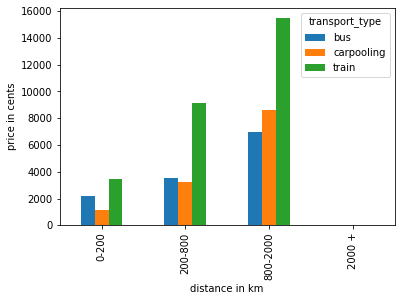

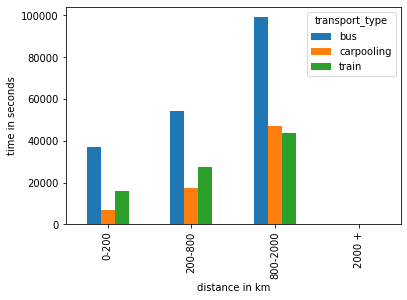

In [37]:
ax = df_by_distance_type['price_in_cents'].unstack('transport_type').plot.bar()
ax.set_xlabel('distance in km');
ax.set_ylabel('price in cents');

ax = df_by_distance_type['travel_ts_seconds'].unstack('transport_type').plot.bar()
ax.set_xlabel('distance in km');
ax.set_ylabel('time in seconds');

### we can clearly see that the best choice (time for money) is carpooling

In [38]:
#quick check that we have enough data the make a conclusion
df_final.transport_type.value_counts()

carpooling    41441
train         18929
bus           13798
Name: transport_type, dtype: int64

### we dont have distance higher than 2000km because we skipped the middle stations

In [39]:
df_by_distance_type['travel_ts_seconds'] = df_by_distance_type['travel_ts_seconds'] * np.timedelta64(1, 's')


df_by_distance_type = df_by_distance_type.rename(columns={'travel_ts_seconds': 'travel_ts'})

/Users/midounhocine/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/dispatch.py:125: RuntimeWarning: invalid value encountered in multiply
  res_values = op(left, right)


In [41]:
df_by_distance_type

price_in_cents              travel_ts
transport_type distance_category                                       
bus            0-200                 2182.830918 0 days 10:13:57.053140
               200-800               3494.850022 0 days 15:04:29.269314
               800-2000              6949.950045 1 days 03:32:10.027247
               2000 +                        NaN                    NaT
carpooling     0-200                 1177.352385 0 days 01:57:07.342427
               200-800               3218.064310 0 days 04:45:47.272436
               800-2000              8626.545455 0 days 13:06:00.839160
               2000 +                        NaN                    NaT
train          0-200                 3487.900779 0 days 04:25:09.840098
               200-800               9124.779489 0 days 07:40:39.543514
               800-2000             15463.746130 0 days 12:09:31.021671
               2000 +                        NaN                    NaT

In [40]:
df_by_distance_type.to_csv('second_question.csv')